### Exercise b)
Use a binary classification data available from scikit-learn. As an example you can use the MNIST data set and just specialize to two numbers. To do so you can use the following code lines



(252, 64)
(108, 64)
Accuracy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test set accuracy with Logistic Regression 1.0


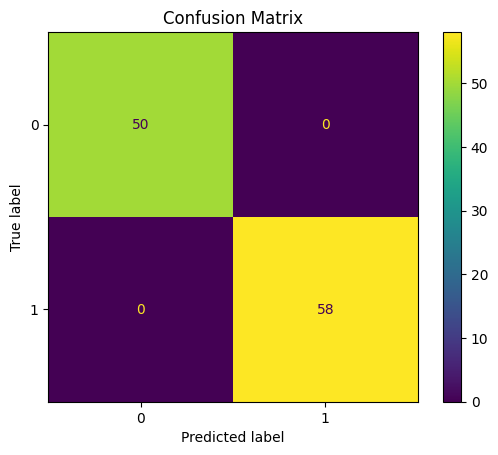

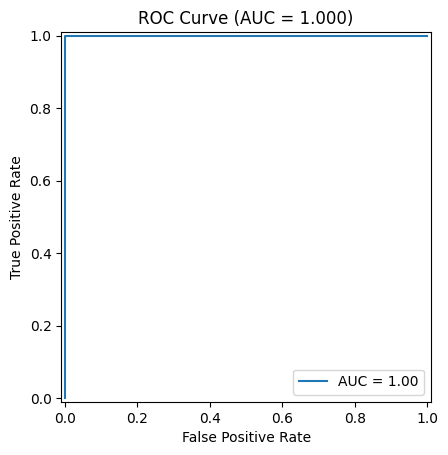

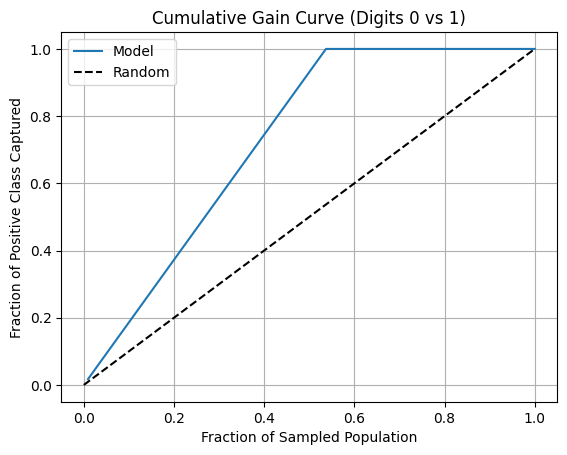

In [4]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression


digits = load_digits(n_class=2)
X, y = digits.data, digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314)

print(X_train.shape)
print(X_test.shape)

# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
# Cross Validation
accuracy = cross_validate(logreg, X_test, y_test, cv=10)['test_score']
print("Accuracy:", accuracy)
print("Test set accuracy with Logistic Regression", logreg.score(X_test,y_test))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, roc_auc_score
y_pred = logreg.predict(X_test)
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

# Roc Curve
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.show()

#  Cumulative Gain 
order = np.argsort(-y_prob)
y_sorted = y_test[order]
cum_pos = np.cumsum(y_sorted)
total_pos = np.sum(y_sorted)
percent_samples = np.arange(1, len(y_sorted) + 1) / len(y_sorted)
percent_positives = cum_pos / total_pos

plt.plot(percent_samples, percent_positives, label="Model")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.title("Cumulative Gain Curve (Digits 0 vs 1)")
plt.xlabel("Fraction of Sampled Population")
plt.ylabel("Fraction of Positive Class Captured")
plt.legend()
plt.grid(True)
plt.show()


### Exercise c) 
As a multiclass problem, we will use the Iris data set discussed in the exercises from weeks 41 and 42. This is a three-class data set and you can set it up using scikit-learn,

Make plots of the confusion matrix, the ROC curve and the cumulative gain curve for this (or other) multiclass data set.


c:\Users\vikto\Desktop\fysstk3155\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


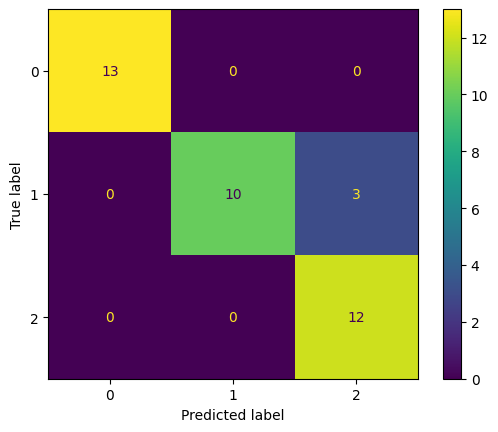

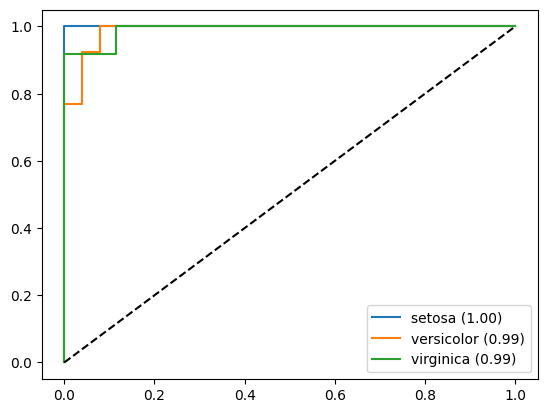

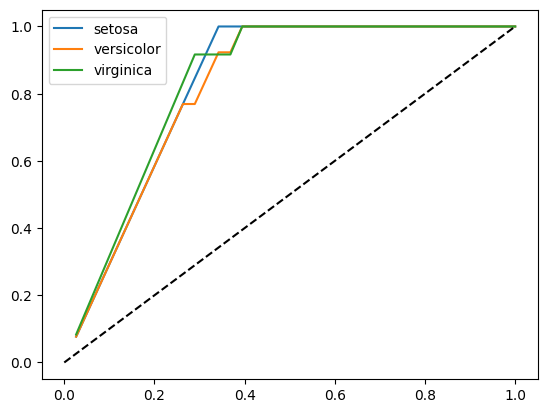

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.show()

from sklearn.preprocessing import label_binarize
y_bin = label_binarize(y_test, classes=[0,1,2])
y_prob = logreg.predict_proba(X_test)

from sklearn.metrics import roc_curve, roc_auc_score
plt.figure()
for i in range(3):
    fpr, tpr, _ = roc_curve(y_bin[:,i], y_prob[:,i])
    plt.plot(fpr, tpr, label=f"{iris.target_names[i]} ({roc_auc_score(y_bin[:,i], y_prob[:,i]):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.show()

import numpy as np
plt.figure()
for i in range(3):
    order = np.argsort(-y_prob[:,i])
    y_sorted = y_bin[:,i][order]
    pct_samples = np.arange(1, len(y_sorted)+1)/len(y_sorted)
    pct_pos = np.cumsum(y_sorted)/y_sorted.sum()
    plt.plot(pct_samples, pct_pos, label=iris.target_names[i])
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.show()
